# Of All energy types, which are the most prevalent worldwide?
### Data source: data.UN.org Energy Statistics Database

## i.Data Cleansing

### i.a. Combining & Merging

#### Energy sources are in separate csv files.  Many data sources need to be combined into one.

In [131]:
#combining all datasets using map function

import glob
import pandas as pd 

#map renewables

df_renew = pd.concat(map(pd.read_csv, glob.glob('C:/Users/Rachel/OneDrive/Documents/Springboard/CAPSTONE 2/energy/raw_data_renewable/*.csv')))
df_renew.rename(columns={'Country or Area':'Geo'}, inplace=True)

#map nonrenewables

df_nonrenew = pd.concat(map(pd.read_csv, glob.glob('C:/Users/Rachel/OneDrive/Documents/Springboard/CAPSTONE 2/energy/raw_data_nonrenewable/*.csv')))
df_nonrenew.rename(columns={'Country or Area':'Geo'}, inplace=True)

df = pd.concat([df_renew, df_nonrenew])

#split commodity and transaction into two columns
#defining column to split and which delimiter
ct = df['Commodity - Transaction'].str.split('-')

#assigning new columns
df['Commodity'] = ct.str.get(0)
df['Transaction'] = ct.str.get(1)

#lowercase and remove trailing and leading spaces
df['Commodity'] = df['Commodity'].str.lower()
df['Commodity'] = df['Commodity'].str.strip()

df['Transaction'] = df['Transaction'].str.lower()
df['Transaction'] = df['Transaction'].str.strip()

df = df[df['Transaction'] == 'production']

#df.shape




In [132]:
#import dataframe with conversion units
import pandas as pd 
unit_conv = pd.read_csv('C:/Users/Rachel/OneDrive/Documents/Springboard/CAPSTONE 2/energy/renewable_energy_units_conv_2.csv')

In [133]:
#merge dataframes with conversion units

df_merge = pd.merge(df,  
                     unit_conv,  
                     on ='Commodity', 
                     how ='left') 

df_merge['TJ'] = df_merge['Quantity'] * df_merge['Conv_mt_to_tj']
df_merge.sample(2)

,Geo,Commodity - Transaction,Year,Unit,Quantity,Quantity Footnotes,Commodity,Transaction,Description,Units,Conv_mt_to_tj,r_type,TJ
30767,Bolivia (Plur. State of),Aviation gasoline - Production,2000.0,"Metric tons, thousand",3.0,NaN,aviation gasoline,production,NaN,"Metric tons, thousand",44.3,nonrenewable,132.9
73054,Japan,Other recovered gases - Production,2000.0,Terajoules,70925.0,NaN,other recovered gases,production,NaN,Terajoules,1.0,renewable,70925.0


## ii.All Energy Sources Metrics 2018

#### All energy sources 'production'

In [134]:

#sum all energy sources by year from 1990 to 2018
lt_2019 = df_merge[df_merge['Year'] < 2019]
tot_grp_year = lt_2019.groupby(['Year'])
df_tot_year = tot_grp_year['TJ'].agg(['sum'])

#sum all renewables
lt_2019_r = df_merge[(df_merge['Year'] < 2019) & (df_merge['r_type'] == 'renewable')]
tot_r_grp_year = lt_2019_r.groupby(['Year'])
df_tot_year_r = tot_r_grp_year['TJ'].agg(['sum'])

#sum all nonrenewables
lt_2019_n = df_merge[(df_merge['Year'] < 2019) & (df_merge['r_type'] == 'nonrenewable')]
tot_n_grp_year = lt_2019_n.groupby(['Year'])
df_tot_year_n = tot_n_grp_year['TJ'].agg(['sum'])

In [135]:
# ***sum renewable & nonrenewable in the same way and change plot below to subplot w/ three lines

In [136]:
allsources_r = pd.merge(df_tot_year,  
                     df_tot_year_r,  
                     on ='Year', 
                     how ='left') 

allsources_r_n = pd.merge(allsources_r,
                    df_tot_year_n,
                    on = 'Year', 
                    how = 'left')

allsources_r_n.rename(columns={'sum_x':'total', 'sum_y': 'renew', 'sum' : 'nonrenew'}, inplace=True)
#allsources_r_n['diff'] = allsources_r_n['renew'] + allsources_r_n['nonrenew']#

allsources_r_n.head()

,total,renew,nonrenew
Year,,,
1990.0,5.040321e+08,4.029732e+07,4.637348e+08
1991.0,5.065061e+08,4.138959e+07,4.651165e+08
1992.0,5.227492e+08,4.243564e+07,4.803136e+08
1993.0,5.218211e+08,4.275528e+07,4.790659e+08
1994.0,5.270934e+08,4.388915e+07,4.832043e+08


AxesSubplot(0.125,0.125;0.775x0.755)


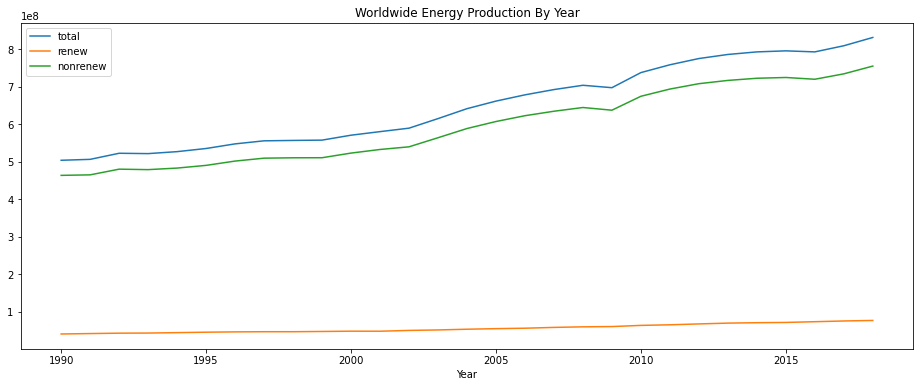

In [137]:
import matplotlib.pyplot as plt 

df_tot_year.sort_values(by='Year', ascending=True, inplace=True)
df_tot_year_r.sort_values(by='Year', ascending=True, inplace=True)
df_tot_year_n.sort_values(by='Year', ascending=True, inplace=True)

print(allsources_r_n.plot(figsize=(16,6), title='Worldwide Energy Production By Year'))


In [138]:
#what was the percent renewable in 2018?

df_r_type_18 = df_merge[df_merge['Year'] == 2018]
r_grp_18 = df_r_type_18.groupby(['r_type'])
sum_r_type_18 = r_grp_18['TJ'].agg(['sum'])
sum_r_type_18['percent'] = (sum_r_type_18['sum'] / sum_r_type_18['sum'].sum()) * 100
sum_r_type_18.head()

,sum,percent
r_type,,
nonrenewable,7.555105e+08,90.815362
renewable,7.640877e+07,9.184638


#### Percent renewable?

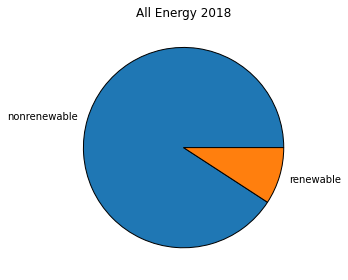

In [139]:
from matplotlib import pyplot as plt 

pie = sum_r_type_18['sum']
labels = ['nonrenewable', 'renewable']

#plt.style.use("fivethirtyeight")

plt.pie(pie, labels=labels, wedgeprops={'edgecolor':'black'})
plt.title("All Energy 2018")
plt.tight_layout()
plt.show()



In [140]:
#what was the percent renewable in 2008?
df_r_type_08 = df_merge[df_merge['Year'] == 2008]
r_grp_08 = df_r_type_08.groupby(['r_type'])
sum_r_type_08 = r_grp_08['TJ'].agg(['sum'])
sum_r_type_08['percent'] = (sum_r_type_08['sum'] / sum_r_type_08['sum'].sum()) * 100
sum_r_type_08.head()

,sum,percent
r_type,,
nonrenewable,6.449023e+08,91.571085
renewable,5.936183e+07,8.428915


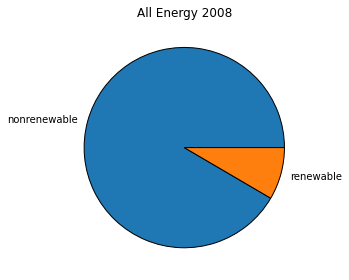

In [141]:
from matplotlib import pyplot as plt 

pie = sum_r_type_08['sum']
labels = ['nonrenewable', 'renewable']

#plt.style.use("fivethirtyeight")

plt.pie(pie, labels=labels, wedgeprops={'edgecolor':'black'})
plt.title("All Energy 2008")
plt.tight_layout()
plt.show()

In [142]:
#filter 2018, group by Commodity, sum of TJ
df_2018 = df_merge[df_merge['Year'] == 2018]
comm_grp_18 = df_2018.groupby(['Commodity'])
sum_2018 = comm_grp_18['TJ'].agg(['sum'])

#same thing for 2008

df_2008 = df_merge[df_merge['Year'] == 2008]
comm_grp_08 = df_2008.groupby(['Commodity'])
sum_2008 = comm_grp_08['TJ'].agg(['sum'])



In [143]:
#change 'sum' heading to TJ 2018, TJ 2008
sum_2018.rename(columns={'sum' : 'Total TJ 2018'}, inplace=True)
sum_2008.rename(columns={'sum' : 'Total TJ 2008'}, inplace=True)

In [144]:
#combine 2018 and 2008 data frames to get percentage change
allsources_change = pd.concat([sum_2008, sum_2018], axis='columns', sort=False)

In [145]:
sum_2018.head()

,Total TJ 2018
Commodity,
additives and oxygenates,1.450680e+05
animal waste,6.828780e+05
anthracite,1.099642e+06
aviation gasoline,7.265971e+04
bagasse,3.575350e+06


In [152]:
import matplotlib.pyplot as plt 

# pc_only = allsources_change.drop(['Total TJ 2018', 'Total TJ 2008', 'change'],axis=1)
# pc_only.sort_values(by='perc_change', ascending=False, inplace=True)
sum_2018.sort_values(by='Total TJ 2018', ascending=False, inplace=True)

#print(sum_2018.plot(kind='bar', figsize=(16,6), title='Energy Production All Sources in 2018'))

sum_2018.head()

,Total TJ 2018
Commodity,
hard coal,1.754725e+08
conventional crude oil,1.676249e+08
natural gas (including lng),1.375063e+08
motor gasoline,4.486999e+07
gas oil/ diesel oil,4.247552e+07


In [153]:
import matplotlib.pyplot as plt 

# pc_only = allsources_change.drop(['Total TJ 2018', 'Total TJ 2008', 'change'],axis=1)
# pc_only.sort_values(by='perc_change', ascending=False, inplace=True)
sum_2008.sort_values(by='Total TJ 2008', ascending=False, inplace=True)
sum_2008.head()
#print(sum_2008.plot(kind='bar', figsize=(16,6), title='Energy Production from All Sources in 2008'))

,Total TJ 2008
Commodity,
conventional crude oil,1.527573e+08
hard coal,1.396133e+08
natural gas (including lng),1.092550e+08
motor gasoline,3.921158e+07
gas oil/ diesel oil,3.845645e+07


In [148]:
allsources_change['change'] = allsources_change['Total TJ 2018'] - allsources_change['Total TJ 2008']
allsources_change['perc_change'] = (allsources_change['change'] / allsources_change['Total TJ 2008']) * 100
allsources_change.sort_values(by='perc_change', ascending=False)

,Total TJ 2008,Total TJ 2018,change,perc_change
Commodity,,,,
solar electricity,4.420592e+04,2.017290e+06,1.973085e+06,4463.394050
wind electricity,7.336391e+05,4.542049e+06,3.808410e+06,519.112207
biodiesel,5.604483e+05,1.762222e+06,1.201774e+06,214.430830
blast furnace gas,2.331718e+06,6.578436e+06,4.246718e+06,182.128304
industrial waste,5.234859e+05,1.133846e+06,6.103603e+05,116.595354
ethane,1.669286e+06,3.503525e+06,1.834238e+06,109.881588
tide electricity,1.713600e+03,3.548937e+03,1.835337e+03,107.104167
other oil products n.e.c.,4.554934e+06,9.227959e+06,4.673025e+06,102.592601
biogases,5.261217e+05,1.019022e+06,4.929002e+05,93.685582


In [151]:
allsources_change.sort_values(by='Total TJ 2008', ascending=False)

,Total TJ 2008,Total TJ 2018,change,perc_change
Commodity,,,,
conventional crude oil,1.527573e+08,1.676249e+08,1.486758e+07,9.732808
hard coal,1.396133e+08,1.754725e+08,3.585920e+07,25.684656
natural gas (including lng),1.092550e+08,1.375063e+08,2.825126e+07,25.858087
motor gasoline,3.921158e+07,4.486999e+07,5.658403e+06,14.430438
gas oil/ diesel oil,3.845645e+07,4.247552e+07,4.019072e+06,10.450970
fuelwood,2.548123e+07,2.634398e+07,8.627456e+05,3.385808
fuel oil,2.314392e+07,1.751406e+07,-5.629858e+06,-24.325431
brown coal,2.090816e+07,1.647404e+07,-4.434116e+06,-21.207592
coke oven coke,1.510962e+07,1.878086e+07,3.671240e+06,24.297371


AxesSubplot(0.125,0.125;0.775x0.755)


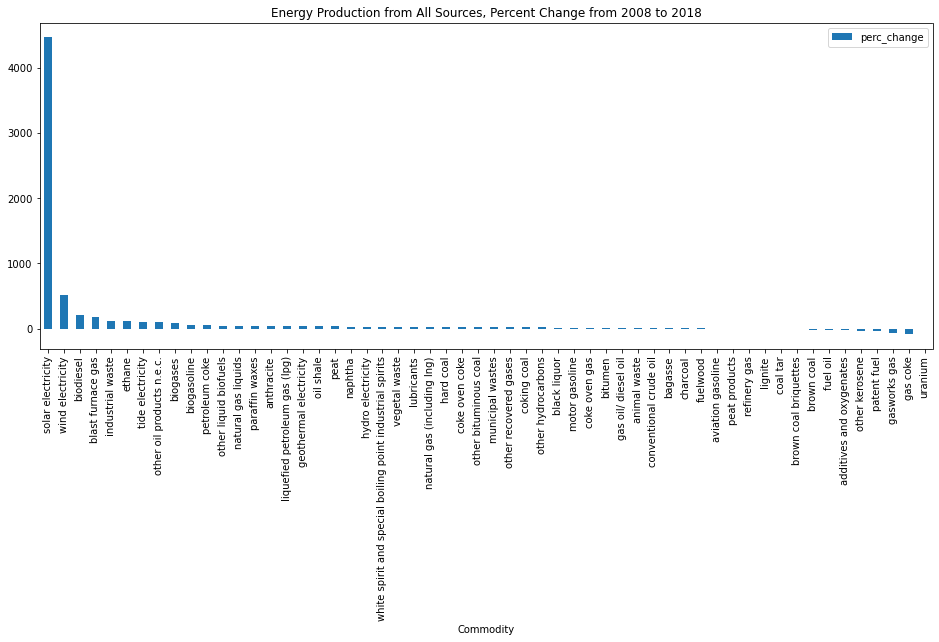

In [149]:
import matplotlib.pyplot as plt 

pc_only = allsources_change.drop(['Total TJ 2018', 'Total TJ 2008', 'change'],axis=1)
pc_only.sort_values(by='perc_change', ascending=False, inplace=True)


print(pc_only.plot(kind='bar', figsize=(16,6), title='Energy Production from All Sources, Percent Change from 2008 to 2018'))

## v.Insights